In [1]:
import requests
import datetime
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)


# CryptoCompare API - August 2017

## Current Price

In [13]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [16]:
price('BTC', exchange='Coinbase')

{u'USD': 10571.03}

In [20]:
price('NEO', ['BTC', 'ETH', 'USD'])

{u'BTC': 0.01436, u'ETH': 0.1335, u'USD': 152.04}

## Daily Historical Price

In [17]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [18]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))
df.head()

Max length = 2755
Max time = 2753 days 23:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902,2010-07-17 03:00:00
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900,2010-07-18 03:00:00
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600,2010-07-19 03:00:00
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900,2010-07-20 03:00:00
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600,2010-07-21 03:00:00


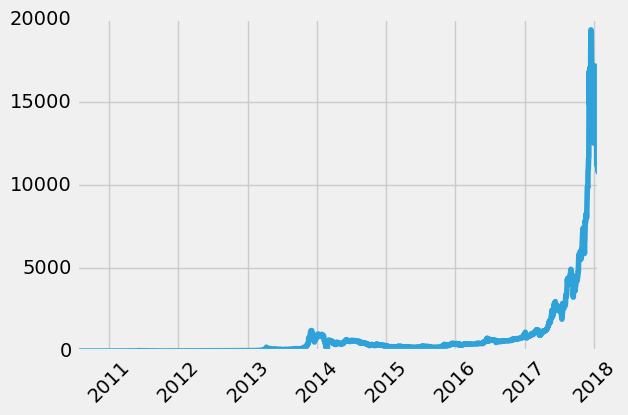

In [19]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

## Historical Hourly Price

In [21]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 2001
Max time = 83 days 08:00:00


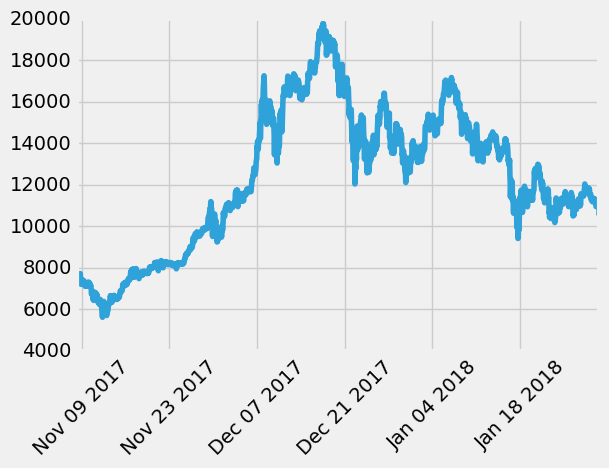

In [22]:
time_delta = 1 # Bar width in hours
df = hourly_price_historical('BTC', 'USD', 9999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

Max length = 84
Max time = 83 days 00:00:00


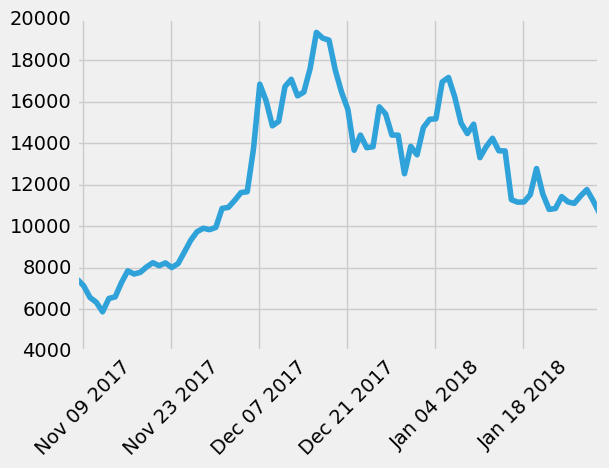

In [23]:
time_delta = 24 # Bar width in hours
df = hourly_price_historical('BTC', 'USD', 9999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

## Historical Price by Minute

In [2]:
def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 2001
Max time = 1 days 09:20:00


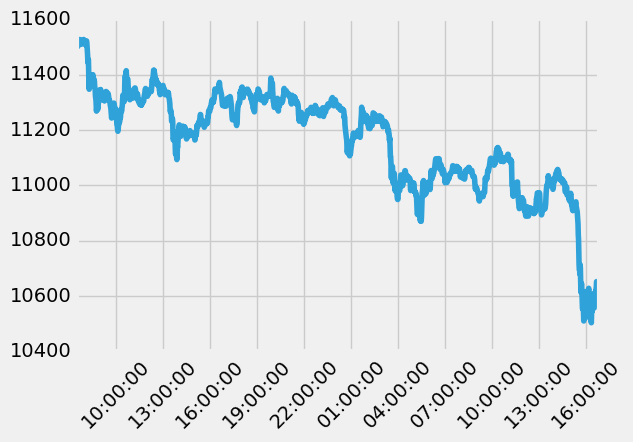

In [38]:
time_delta = 1 # Bar width in minutes
df = minute_price_historical('BTC', 'USD', 9999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [136]:
time_delta = 1 # Bar width in minutes
df = minute_price_historical('BTC', 'USD', 9999, time_delta)
df.to_csv("BTC.csv")

In [30]:
coin = 'BTC'
data_filename = coin + ".csv"
time_delta = 1 # Bar width in minutes
new_data = minute_price_historical(coin, 'USD', 9999, time_delta)
old_data = pd.DataFrame.from_csv(data_filename)
merged_data.to_csv(data_filename)

BTC New Entries: 0


In [53]:
import os.path
import threading
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

#----------------------------------------------------------------
# Galea code from https://github.com/agalea91/cryptocompare-api
#----------------------------------------------------------------
class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

#----------------------------------------------------------------
#----------------------------------------------------------------


COINS = ['BTC', 'ETH', 'LTC', 'XRP', 'BCH', 'ADA', 'NEO', 'XLM', 'EOS', 'XEM']
DATA_FETCH_INTERVAL = 30 #seconds

def fetch_new_coin_data():
    for coin in COINS:
        data_filename = coin + ".csv"
        time_delta = 1 # Bar width in minutes
        new_data = minute_price_historical(coin, 'USD', 9999, time_delta)
        if os.path.exists(data_filename):
            old_data = pd.DataFrame.from_csv(data_filename)
            merged_data = pd.concat([old_data, new_data])
            merged_data['timestamp'] = pd.to_datetime(merged_data.timestamp)
            merged_data = merged_data.sort_values(by=['timestamp'])
            merged_data = merged_data.drop_duplicates(['timestamp'], keep='last')
        else:
            print "Creatine new data file " + data_filename
            old_data = []
            merged_data = new_data
        merged_data.to_csv(data_filename)
        print coin + ": " + str(len(merged_data) - len(old_data)) + " new entries were added"


def fetch_data_periodically():
  threading.Timer(DATA_FETCH_INTERVAL, fetch_data_periodically).start()
  fetch_new_coin_data()
    

fetch_data_periodically()


BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
BTC: 0 new entries were added
XRP: 0 new entries were added
ETH: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
EOS: 0 new entries were added
NEO: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
XLM: 0 new entries were added
ETH: 0 new entries were added
EOS: 0 new entries were added
LTC: 0 new entries were added
XEM: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new

BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added
BTC: 1 new entries were added
ETH: 1 new entries were added
LTC: 1 new entries were added
BTC: 0 new entries were added
XRP: 1 new entries were added
ETH: 0 new entries were added
BCH: 1 new entries were added
LTC: 0 new entries were added
ADA: 1 new entries were added
XRP: 0 new entries were added
NEO: 1 new entries were added
BCH: 0 new entries were added
XLM: 0 new entries were added
ADA: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
BTC: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new

EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BTC: 0 new entries were added
BCH: 0 new entries were added
ETH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new entries were added
NEO: 0 new entries were added
XRP: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new

LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added
BTC: 1 new entries were added
ETH: 1 new entries were added
LTC: 1 new entries were added
XRP: 1 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
BCH: 1 new entries were added
LTC: 0 new entries were added
ADA: 1 new entries were added
XRP: 0 new entries were added
NEO: 1 new entries were added
BCH: 0 new entries were added
XLM: 0 new entries were added
ADA: 0 new entries were added
EOS: 0 new entries were added
NEO: 0 new

XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BTC: 0 new entries were added
BCH: 0 new entries were added
ETH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new

XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added
BTC: 1 new entries were added
ETH: 1 new entries were added
LTC: 1 new entries were added
XRP: 1 new entries were added
BTC: 0 new

ETH: 0 new entries were added
BCH: 1 new entries were added
LTC: 0 new entries were added
ADA: 1 new entries were added
XRP: 0 new entries were added
NEO: 1 new entries were added
BCH: 0 new entries were added
XLM: 0 new entries were added
ADA: 0 new entries were added
EOS: 0 new entries were added
NEO: 0 new entries were added
XEM: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new

XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BTC: 0 new entries were added
BCH: 0 new entries were added
ETH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new entries were added
NEO: 0 new entries were added
XRP: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new

XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added
BTC: 1 new entries were added
BTC: 0 new entries were added
ETH: 1 new entries were added
ETH: 0 new entries were added
LTC: 1 new entries were added
XRP: 1 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 1 new entries were added
BCH: 0 new entries were added
ADA: 1 new entries were added
ADA: 0 new entries were added
NEO: 1 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new

XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BTC: 0 new entries were added
BCH: 0 new entries were added
ETH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new entries were added
NEO: 0 new entries were added
XRP: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new

XEM: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added
BTC: 1 new entries were added
ETH: 1 new entries were added
LTC: 1 new entries were added
BTC: 0 new entries were added
XRP: 1 new entries were added
ETH: 0 new entries were added
BCH: 1 new entries were added
LTC: 0 new entries were added
ADA: 1 new entries were added
XRP: 0 new entries were added
NEO: 1 new entries were added
BCH: 0 new entries were added
XLM: 0 new entries were added
ADA: 0 new entries were added
EOS: 0 new

XLM: 0 new entries were added
EOS: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BTC: 0 new entries were added
BCH: 0 new entries were added
ETH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new

NEO: 0 new entries were added
XRP: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
BTC: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
ETH: 0 new entries were added
XEM: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added
BTC: 1 new entries were added
BTC: 0 new entries were added
ETH: 1 new

BTC: 0 new entries were added
XRP: 1 new entries were added
ETH: 0 new entries were added
BCH: 1 new entries were added
LTC: 0 new entries were added
ADA: 0 new entries were added
XRP: 0 new entries were added
NEO: 0 new entries were added
BCH: 0 new entries were added
XLM: 0 new entries were added
ADA: 0 new entries were added
EOS: 0 new entries were added
NEO: 0 new entries were added
XEM: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new

XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BTC: 0 new entries were added
BCH: 0 new entries were added
ETH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new entries were added
NEO: 0 new entries were added
XRP: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new

ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added


Exception in thread Thread-11:
Traceback (most recent call last):
  File "/Users/oravner/anaconda/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/Users/oravner/anaconda/lib/python2.7/threading.py", line 1073, in run
    self.function(*self.args, **self.kwargs)
TypeError: data_fetch_thread_function() takes exactly 1 argument (0 given)



BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 1 new entries were added


## Coin List

In [58]:
def coin_list():
    url = 'https://www.cryptocompare.com/api/data/coinlist/'
    page = requests.get(url)
    data = page.json()['Data']
    return data

BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BTC: 0 new entries were added
BCH: 0 new entries were added
ETH: 0 new entries were added
ADA: 0 new entries were added
LTC: 0 new entries were added
NEO: 0 new entries were added
XRP: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added


In [60]:
data = coin_list()
RenderJSON(data)

BTC: 0 new entries were added


ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 1 new entries were added
XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added
BTC: 1 new entries were added
ETH: 1 new entries were added
LTC: 1 new entries were added
BTC: 0 new entries were added
XRP: 1 new entries were added
ETH: 0 new entries were added
BCH: 1 new entries were added
LTC: 0 new entries were added
ADA: 1 new entries were added
XRP: 0 new entries were added
NEO: 0 new entries were added


In [59]:
print(len(data))

NameError: name 'data' is not defined

In [61]:
symbol_id_dict = {symb: int(d['Id']) for symb, d in data.items()}

BCH: 0 new entries were added
XLM: 0 new entries were added
ADA: 0 new entries were added
EOS: 0 new entries were added
NEO: 0 new entries were added
XEM: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added


In [31]:
print(json.dumps(symbol_id_dict, indent=2))

{
  "LIFE": 381189, 
  "XBY": 66694, 
  "AGI": 710156, 
  "CSNO": 202714, 
  "XBP": 710087, 
  "XBS": 5023, 
  "ORME": 301112, 
  "NYC": 247232, 
  "CAIX": 4406, 
  "AGS": 4326, 
  "B2B": 517795, 
  "XBC": 5391, 
  "SPX": 23435, 
  "MEGA": 33393, 
  "SPR": 3649, 
  "SPT": 4609, 
  "PSEUD": 4588, 
  "CHASH": 3648, 
  "SPK": 645791, 
  "SPM": 21229, 
  "SPN": 196549, 
  "SPA": 4608, 
  "SPC": 7624, 
  "SPF": 639943, 
  "XPH": 7590, 
  "XPO": 29008, 
  "XPM": 5029, 
  "GP": 7625, 
  "XPB": 5346, 
  "XPD": 3646, 
  "XPY": 5030, 
  "GB": 26194, 
  "XPS": 105220, 
  "BTTF": 33945, 
  "BYC": 5308, 
  "IXT": 141171, 
  "JNS": 34440, 
  "SND": 314865, 
  "MAR": 43814, 
  "BTX*": 6113, 
  "SNC": 179926, 
  "XBL": 375352, 
  "MAY": 348094, 
  "MAX": 4558, 
  "SNM": 136244, 
  "SNK": 196612, 
  "HIVE": 679566, 
  "MAC": 41962, 
  "PQT": 179077, 
  "SNS": 28027, 
  "MAG": 404752, 
  "MAN": 446051, 
  "SPHTX": 379248, 
  "BEN": 4336, 
  "CRTM": 255489, 
  "EVC": 308072, 
  "EVE": 719223, 
  "EVX": 1

## Live Coin Info

In [54]:
def coin_snapshot_full_by_id(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/coinsnapshotfullbyid/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

XLM: 1 new entries were added
EOS: 1 new entries were added
XEM: 1 new entries were added


In [55]:
data = coin_snapshot_full_by_id('ETH', symbol_id_dict)
RenderJSON(data)

NameError: name 'symbol_id_dict' is not defined

BTC: 1 new entries were added
ETH: 1 new entries were added
LTC: 1 new entries were added
XRP: 1 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
BCH: 1 new entries were added
ADA: 1 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
BCH: 0 new entries were added
EOS: 0 new entries were added
ADA: 0 new entries were added
XEM: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
BTC: 0 new entries were added
XEM: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new entries were added
BCH: 0 new entries were added
ADA: 0 new entries were added
NEO: 0 new entries were added
XLM: 0 new entries were added
EOS: 0 new entries were added
XEM: 0 new entries were added
BTC: 0 new entries were added
ETH: 0 new entries were added
LTC: 0 new entries were added
XRP: 0 new

In [34]:
data = live_social_status('NEO', symbol_id_dict)
RenderJSON(data)

In [35]:
def live_social_status(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/socialstats/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data
data = live_social_status('BTC', symbol_id_dict)
RenderJSON(data)

NameError: name 'live_social_status' is not defined